# **SW08: k-Nearest Neighbors (kNN)**

The k-nearest neighbors (kNN) method is a simple, instance-based learning 
algorithm used for classification and regression. In kNN, predictions are 
made based on the *k* closest training examples (neighbors) to a given 
data point, where *k* is a predefined integer. For classification, the model 
assigns the most common class among the *k* neighbors (majority voting), while
for regression, it averages the values of the neighbors. 

![Illustration of kNN for classfication and regression](../data/images/knn-illustration.svg?2)

In the above illustrations, we see how kNN can be used for classification and regression.
On the left, the situation of a classification problem with two feature variables x1 and x2 and 
two classes (A: red stars, B: green triangles) is shown.
For a new data point (blue square), we can predict the class by looking at the *k* nearest neighbors.
If *k*=3, the prediction would be class B (2 green triangles vs. 1 red star). If *k*=7, the prediction 
would be class A (4 red stars vs. 3 green triangles).

On the right, the situation of a regression with one feature (*x*-axis) and one target variable (*y*-axis) is depicted.
Again, we can predict the value of the target variable (*y*) for a new data point (blue square) by looking at the *k* 
nearest neighbors in the feature space (here: the x-axis). The prediction is the average of the target values of the
*k* nearest neighbors. 


In this notebook, we apply the kNN to solve machine learning tasks. We will be using the iris dataset, which you are already very familiar with. Recall that the iris dataset has **4 features** (sepal length, sepal width, petal
length, and petal width) and **3 classes** (setosa, versicolor, and virginica).

---

## **Setup**



In [13]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.datasets import load_iris

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Adjust the default settings for plots
import sys
sys.path.append("..")
import ml
ml.setup_plotting()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Load the iris dataset
data = load_iris(as_frame=True)
X = data.data
y = data.target

display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


---

## **Basic example**

Let's apply kNN directly to predict how it performs on the iris dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

print("Accuracy: {:.2f}".format(accuracy_score(y, y_pred)))

Accuracy: 0.96


In [16]:
########################
###    EXERCISE 1    ###
########################

# Part 1:
# -------
# Play around with the n_neighbors parameter and see how it affects the 
# accuracy of the model. What is the best value for n_neighbors?

# Part 2:
# -------
# Remember: It is recommended to assess the model's performance on a separate
# test set, rather than the training set. Can you update the code such that it 
# uses a train-test split?

**siehe Lösungen**

---

## **Similarity and distance measures**

In kNN, the intuition is: The smaller the distance between samples in the 
feature space, the more similar they are. By identfiying for a new sample 
the k nearest neighbors in the training set, we find its k most similar
samples, which we can use to predict the target of the new sample. Therefore, 
distance measures are fundamental for kNN, as they determine which 
training instances are nearest ("most similar") to a new data point.

The most common distance measure is the **Euclidean distance**, which is defined as:
$$d(x_A, x_B) = \sqrt{\sum_{i=1}^d (x_{A,i} - x_{B,i})^2}$$
It measures the straight-line distance between two points $x_A$ and $x_B$ in 
feature space. Remember: $x_A$, $x_B$ are numerical vectors of the features. The parameter
$d$ refers to the number of features in the dataset. The **Minkowski distance** is a 
generalization of the Euclidean distance and is defined as:
$$d(x_A, x_B) = \left(\sum_{i=1}^d |x_{A,i} - x_{B,i}|^p\right)^{1/p}$$
The parameter p determines the type of distance:
- $p=1$: Manhattan distance
- $p=2$: Euclidean distance
- $p=\infty$: Chebyshev distance

Note that there are many more distance measures possible. It depends on the
problem, which distance measure is most suitable. For example, the [cosine
similarity](https://en.wikipedia.org/wiki/Cosine_similarity) 
$s(x_A, x_B)$ is often used for text data.

$$\begin{align}
s(x_A, x_B) &= \frac{x_A \cdot x_B}{||x_A|| \cdot ||x_B||} = \frac{\sum_{i=1}^d x_{A,i}x_{B,i}}{\sum_{i=1}^d x_{A,i}^2 \cdot\sum_{i=1}^d x_{B,i}^2}\\[2em]
d(x_A, x_B) &= 1 - s(x_A, x_B)
\end{align}
$$

Don't get overwhelmed by this last formula. The cosine similarity measures 
the cosine of the angle between two vectors. If the vectors point into 
the same direction, the cosine is 1. If they are orthogonal (rechtwinklig), 
the cosine is 0. If they point into opposite directions, the cosine is -1.


In [17]:
########################
###    EXERCISE 2    ###
########################

# Assume we have a point x_A = [1, -2, 3] in 3D space. A second point x_B is
# computed from x_A by adding a displacement vector delta. The displacement
# can be scaled by a factor. 

# Compute the Euclidean, Manhattan and Cosine distance between the two points
# for factors 0., 0.1, 1.0 and 10.0.

factor = 1
delta = np.array([2, 1, -1])
x_A = np.array([1, -2, 3])
x_B = x_A + factor*delta

d_euclidean = np.sqrt(np.sum((x_B - x_A)**2))
d_manhattan = np.sum(np.abs(x_B - x_A))
cosine_similarity = np.dot(x_A, x_B) / (np.linalg.norm(x_A) * np.linalg.norm(x_B))
d_cosine = 1 - cosine_similarity

print(d_euclidean)
print(d_manhattan)
print(d_cosine)


2.449489742783178
4
0.2142857142857143


---

## **Normalization**


Note that in some cases, it can be helpful to **normalize the data** before 
using the kNN algorithm because kNN relies on distance measurements to find 
the nearest neighbors. If the data is not normalized, features with larger 
numerical ranges (e.g., income in thousands vs. age in years) will dominate 
the distance calculation, making the algorithm biased toward these features. 
Normalizing ensures that all features contribute equally to the distance 
metric, leading to a more balanced and accurate prediction.

Several methods exist to normalize the data in scikit-learn. Here, we use the
StandardScaler, which scales the data to have zero mean and unit variance.



In [18]:
########################
###    EXERCISE 3    ###
########################

# How to normalize the iris dataset such that each feature has zero mean and 
# unit variance?

# Hint: Use the StandardScaler from sklearn.preprocessing.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled.describe().loc[["mean", "std"]])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00


---

## **Decision boundaries**

In a previous tutorial (on decision trees), we have used the function 
plot_decision_boundary() to visualize the decision boundary of a classifier 
using two features. Let's use this function again to visualize the decision
boundary, this time of a kNN classifier. For visualization purposes, we will
only use the first two features of the iris dataset.


```python
def plot_decision_boundary(clf, X, y, 
                          n_steps=1000, 
                          data=None, 
                          ax=None):
    """
    Visualize the decision boundary of an arbitrary classifier.

    clf:  The classifier to plot.
    X:    The features of the dataset.
    y:    The labels of the dataset.
    n_steps: Parameter controlling the resolution of plot.
    ax:   (optional) The axis to plot on. If None, a new figure is created.
    data: (optional) Data structure provided by sklearn.datasets.load_iris().
    """
    ...
```

In [20]:
from ml import plot_decision_boundary

features = ["sepal length (cm)", "sepal width (cm)"]

# Use the scaled version if you managed to solve the previous exercise:
X_2d = X_scaled[features]
# Otherwise, just use:
# X_2d = X[features]


In [ ]:
########################
###    EXERCISE 4    ###
########################

# Use the function plot_decision_boundary() to look how the decision boundary
# changes when using different configurations of the KNeighborsClassifier:
# Just play around with the parameters and see what happens.
# - Different values for n_neighbors: (1, 5, 15, 100)
# - Different values for the weights parameter (uniform, distance)
# - Different types distance metrics (euclidean, manhattan, cosine)
# - Data with our without scaling

**siehe Lösungen**

---

## **kNN for regression**

Here we demonstrate how to use kNN for a simple univariate regression task.


n_neighbors =  1:  MSE = 0.065
n_neighbors =  5:  MSE = 0.040


c:\Daten\ADLS\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Daten\ADLS\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


n_neighbors = 50:  MSE = 0.730


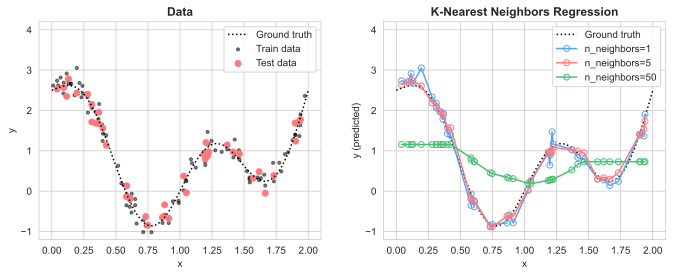

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def fun(x):
    """This is the ground truth function we want to approximate."""
    return np.sin(2*np.pi*x) + 2.5*(x-1)**2

def generate_data(n_samples=100, noise=0.1, fun=fun, seed=42):
    """Given the function fun, generate n_samples with noise."""
    np.random.seed(seed)
    x = np.random.uniform(0, 2, n_samples)
    y = fun(x) + np.random.randn(n_samples)*noise
    # Reshape the feature vector. scikit-learn objects expect a 2D 
    # array for the features (even if it's just one feature).
    x = x.reshape(-1, 1)
    return x, y

x_train, y_train = generate_data(n_samples=100, noise=0.2)
x_test, y_test = generate_data(n_samples=40, noise=0.2)
xx = np.linspace(0, 2, 100)


fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))
axes[0].plot(xx, fun(xx), label="Ground truth", linestyle=":", color="k")
axes[0].scatter(x_train, y_train, label="Train data", color="k", s=10, alpha=0.5)
axes[0].scatter(x_test, y_test, label="Test data", color="C1")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Data", fontweight="bold")
axes[0].set_ylim(-1.2, 4.2)
axes[0].legend()

n_neighbors = [1, 5, 50]
axes[1].plot(xx, fun(xx), label="Ground truth", color="k", linestyle=":")
for n in n_neighbors:
    clf = KNeighborsRegressor(n_neighbors=n)
    clf.fit(x_train, y_train)
    i_sort = np.argsort(x_test.flatten())
    x_test = x_test[i_sort]
    y_test = y_test[i_sort]
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"n_neighbors = {n:2d}:  MSE = {mse:.3f}")
    axes[1].plot(x_test, y_pred, label=f"n_neighbors={n}", 
                 marker='o', markerfacecolor='none')
axes[1].legend()
axes[1].set_xlabel("x")
axes[1].set_ylabel("y (predicted)")
axes[1].set_title("K-Nearest Neighbors Regression", fontweight="bold")
axes[1].set_ylim(-1.2, 4.2)
fig.tight_layout(pad=3)

Again, we see that the model complexity influences the performance.
For small n_neighbors, the model is more complex and can capture more
details in the data. On the downside, it is more prone to overfitting.
For large n_neighbors, the model is simpler and less prone to overfitting,
but it might not capture relevant details in the data.